<a href="https://colab.research.google.com/github/victor048/Yahoo_Finance/blob/main/Finance_Ambev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics, linear_model, preprocessing, tree

import time, datetime, random

In [ ]:
data = pd.read_csv('/content/ABEV3.SA.csv', index_col='Date')

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-20,11.40,11.85,11.29,11.61,11.257279,22065800.0
2020-04-22,11.65,11.79,11.51,11.62,11.266975,22788300.0
2020-04-23,11.73,11.84,11.44,11.55,11.199101,23608700.0
2020-04-24,11.45,11.55,10.68,11.11,10.772470,50923200.0
2020-04-27,11.35,11.84,11.26,11.61,11.257279,26166300.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2020-04-20 to 2021-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    float64
dtypes: float64(6)
memory usage: 13.4+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,244.000000,244.000000,244.000000,244.000000,244.000000,2.440000e+02
mean,14.049918,14.298770,13.832541,14.044631,13.760466,2.896272e+07
std,1.308440,1.315711,1.310709,1.323389,1.433218,1.496925e+07
min,11.140000,11.550000,10.680000,11.110000,10.772470,7.029000e+06
25%,12.960000,13.192500,12.700000,12.875000,12.483847,1.974972e+07
50%,14.195000,14.440000,13.980000,14.165000,13.769296,2.555850e+07
75%,15.192500,15.402500,14.955000,15.150000,15.029324,3.473880e+07
max,16.500000,16.910000,16.170000,16.799999,16.720312,1.440625e+08


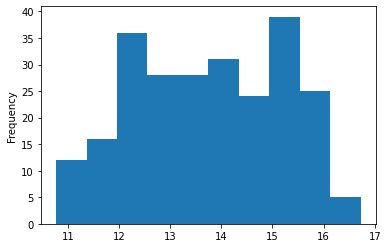

In [ ]:
data['Adj Close'].plot.hist()

In [ ]:
data.rename(columns={'Adj Close':'Adj_Close'}, inplace= True)

In [ ]:
data.head()

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2020-04-20,11.40,11.85,11.29,11.61,11.257279,22065800.0
2020-04-22,11.65,11.79,11.51,11.62,11.266975,22788300.0
2020-04-23,11.73,11.84,11.44,11.55,11.199101,23608700.0
2020-04-24,11.45,11.55,10.68,11.11,10.772470,50923200.0
2020-04-27,11.35,11.84,11.26,11.61,11.257279,26166300.0


In [ ]:
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj_Close    1
Volume       1
dtype: int64

In [ ]:
# removendo todos nulos
data.dropna(how='all')

,Open,High,Low,Close,Adj_Close,Volume,Return,Buy
Date,,,,,,,,
2020-04-20,11.40,11.850000,11.29,11.61,11.257279,22065800.0,0.001649,1.0
2020-04-22,11.65,11.790000,11.51,11.62,11.266975,22788300.0,0.000861,1.0
2020-04-23,11.73,11.840000,11.44,11.55,11.199101,23608700.0,-0.006024,1.0
2020-04-24,11.45,11.550000,10.68,11.11,10.772470,50923200.0,-0.038095,1.0
2020-04-27,11.35,11.840000,11.26,11.61,11.257279,26166300.0,0.045004,1.0
...,...,...,...,...,...,...,...,...
2021-04-12,15.50,15.600000,15.36,15.51,15.510000,11987600.0,0.009766,0.0
2021-04-13,15.50,15.740000,15.37,15.63,15.630000,19448300.0,0.007737,0.0
2021-04-14,15.64,15.900000,15.62,15.81,15.810000,21466700.0,0.011516,0.0


In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
Return       0
Buy          0
dtype: int64

In [ ]:
data['Adj_Close'].value_counts()

13.264391    3
15.300000    3
12.973505    3
12.857151    3
11.577252    3
            ..
15.950000    1
11.199101    1
14.890000    1
14.631554    1
15.000000    1
Name: Adj_Close, Length: 198, dtype: int64

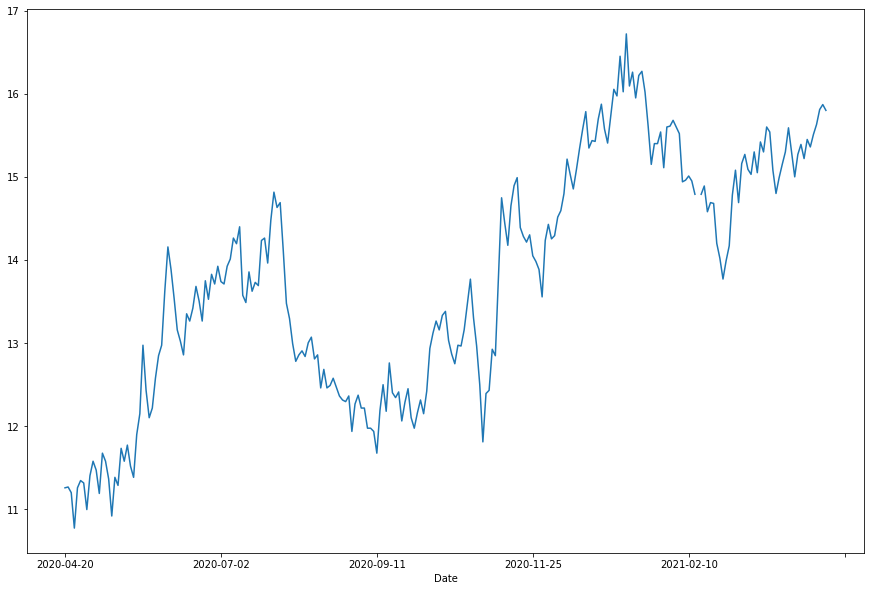

In [ ]:
data['Adj_Close'].plot(figsize=(15,10))

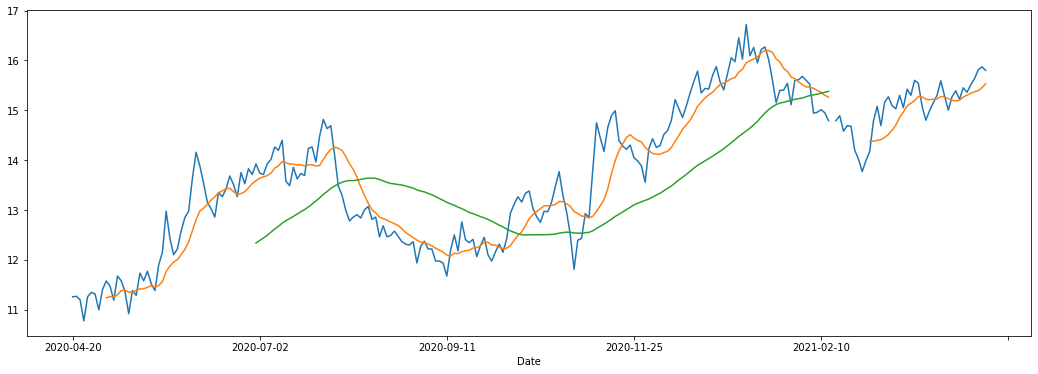

In [ ]:
#Media Movél
data['Adj_Close'].plot(figsize=(18,6), label='AMBEV')
data['Adj_Close'].rolling(10).mean().plot(label='10 dias')
data['Adj_Close'].rolling(50).mean().plot(label='50 dias')

In [ ]:
# Percetual de Retorno

data['Return'] = data['Adj_Close'].pct_change()

In [ ]:
data.head()

,Open,High,Low,Close,Adj_Close,Volume,Return
Date,,,,,,,
2020-04-20,11.40,11.85,11.29,11.61,11.257279,22065800.0,NaN
2020-04-22,11.65,11.79,11.51,11.62,11.266975,22788300.0,0.000861
2020-04-23,11.73,11.84,11.44,11.55,11.199101,23608700.0,-0.006024
2020-04-24,11.45,11.55,10.68,11.11,10.772470,50923200.0,-0.038095
2020-04-27,11.35,11.84,11.26,11.61,11.257279,26166300.0,0.045004


In [ ]:
media_pct_retorno = data['Return'].mean() *100

In [ ]:
print(f'Percentual Retorno Medio: {media_pct_retorno}')

Percentual Retorno Medio: 0.1649032281692592


In [ ]:
print('Percetual retorno médio = {:.2f}%'.format(media_pct_retorno))

Percetual retorno médio = 0.16%


In [ ]:
# Desvio Padrão

desvio_padrao_retorno = data.Return.std()

In [ ]:
print('Percetual retorno médio = {:.2f}'.format(desvio_padrao_retorno))

Percetual retorno médio = 0.02


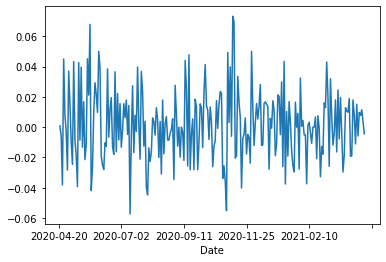

In [ ]:
data['Return'].plot()

In [ ]:
data['Return'].fillna((data['Return'].mean()), inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 2020-04-20 to 2021-04-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj_Close  244 non-null    float64
 5   Volume     244 non-null    float64
 6   Return     245 non-null    float64
dtypes: float64(7)
memory usage: 15.3+ KB


In [ ]:
media_adj_close = data['Adj_Close'].mean()

In [ ]:
media_adj_close

13.760465836065567

In [ ]:
data.loc[data['Adj_Close'] <= media_adj_close, 'Buy'] = 1
data.loc[data['Adj_Close'] > media_adj_close, 'Buy'] = 0

In [ ]:
data.head()

,Open,High,Low,Close,Adj_Close,Volume,Return,Buy
Date,,,,,,,,
2020-04-20,11.40,11.85,11.29,11.61,11.257279,22065800.0,0.001649,1.0
2020-04-22,11.65,11.79,11.51,11.62,11.266975,22788300.0,0.000861,1.0
2020-04-23,11.73,11.84,11.44,11.55,11.199101,23608700.0,-0.006024,1.0
2020-04-24,11.45,11.55,10.68,11.11,10.772470,50923200.0,-0.038095,1.0
2020-04-27,11.35,11.84,11.26,11.61,11.257279,26166300.0,0.045004,1.0


In [ ]:
data.tail()

,Open,High,Low,Close,Adj_Close,Volume,Return,Buy
Date,,,,,,,,
2021-04-12,15.50,15.600000,15.36,15.51,15.51,11987600.0,0.009766,0.0
2021-04-13,15.50,15.740000,15.37,15.63,15.63,19448300.0,0.007737,0.0
2021-04-14,15.64,15.900000,15.62,15.81,15.81,21466700.0,0.011516,0.0
2021-04-15,15.79,16.030001,15.72,15.87,15.87,17705700.0,0.003795,0.0
2021-04-16,15.79,15.960000,15.72,15.80,15.80,13563400.0,-0.004411,0.0


In [ ]:
data['Buy'].value_counts()

0.0    123
1.0    121
Name: Buy, dtype: int64

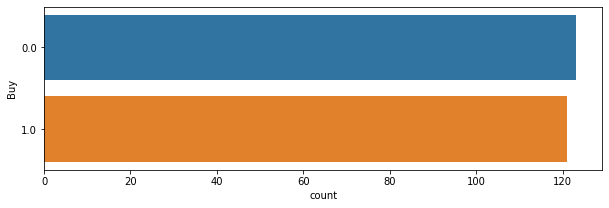

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(y='Buy', data=data)

In [ ]:
X_train = pd.DataFrame()
y_train = pd.DataFrame()

In [ ]:
X_train['High'] = data['High']

In [ ]:
X_train.head()

,High
Date,
2020-04-20,11.85
2020-04-22,11.79
2020-04-23,11.84
2020-04-24,11.55
2020-04-27,11.84


In [ ]:
X_train['Low'] = data['Low']
X_train['Open'] = data['Open']
X_train['Close'] = data['Close']
X_train['Adj_Close'] = data['Adj_Close']
X_train['Return'] = data['Return']

In [ ]:
X_train.head()

,High,Low,Open,Close,Adj_Close,Return
0,11.85,11.29,11.40,11.61,11.257279,0.001649
1,11.79,11.51,11.65,11.62,11.266975,0.000861
2,11.84,11.44,11.73,11.55,11.199101,-0.006024
3,11.55,10.68,11.45,11.11,10.772470,-0.038095
4,11.84,11.26,11.35,11.61,11.257279,0.045004


In [ ]:
X_train.reset_index(drop =True, inplace=True)
y_train.reset_index(drop =True, inplace=True)

In [ ]:
y_train['Buy'] = data['Buy']
y_train.head()

,Buy
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
def fit_ml(algoritmo, X_train, y_train, cv):
  model = algoritmo.fit(X_train, y_train)
  acc = round(model.score(X_train,y_train) *100, 2)

  train_pred = model_selection.cross_val_predict(algoritmo, X_train, y_train, cv=cv, n_job= -1)

  acc_cv = rount(metrics.accuracy_score(y_train, train_pred)*100, 2)

  return train_pred, acc, acc_cv

In [ ]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml(LogisticRegression(), X_train, y_train, 10)

log_time = (time.time() - start_time)
print('Acurácia: %s' %acc_log)
print('Acurácia Cruzada: %s' %acc_cv_log)
print('Tempo: %s' %datetime.timedelta(seconds=log_time))

ValueError: ignored